In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
from ms_mint.notebook import Mint
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.facecolor"] = "w"
plt.rcParams["figure.dpi"] = 150
sns.set_context('talk')

In [3]:
mint = Mint()

In [4]:
mint.load_targets('/data/MINT-stuff/MINT_demofiles/MINT-targets.csv')
mint.targets

peak_label    mz_mean  mz_width       rt  rt_min  rt_max rt_unit  \
0    Arabitol  151.06050        10  295.500   279.0   312.0       s   
1    Xanthine  151.02585        10  262.359   250.8   271.8       s   
2   Succinate  117.01905        10  122.634    52.2   150.0       s   
3   Urocanate  137.03540        10  264.900   258.0   276.0       s   
4  Mevalonate  147.06570        10  180.000   102.0   258.0       s   
5  Nicotinate  122.02455        10  183.204   165.0   225.0       s   
6  Citrulline  174.08810        10  504.042   501.0   510.0       s   

   intensity_threshold   target_filename  
0                    0  MINT-targets.csv  
1                    0  MINT-targets.csv  
2                    0  MINT-targets.csv  
3                    0  MINT-targets.csv  
4                    0  MINT-targets.csv  
5                    0  MINT-targets.csv  
6                    0  MINT-targets.csv

In [5]:
mint.ms_files = glob('/data/MINT-stuff/MINT_demofiles/**/*mz*ML')
mint.ms_files

['/data/MINT-stuff/MINT_demofiles/ms-files/CA_B1.mzXML',
 '/data/MINT-stuff/MINT_demofiles/ms-files/CA_B2.mzXML',
 '/data/MINT-stuff/MINT_demofiles/ms-files/CA_B3.mzXML',
 '/data/MINT-stuff/MINT_demofiles/ms-files/CA_B4.mzXML',
 '/data/MINT-stuff/MINT_demofiles/ms-files/EC_B1.mzXML',
 '/data/MINT-stuff/MINT_demofiles/ms-files/EC_B2.mzXML',
 '/data/MINT-stuff/MINT_demofiles/ms-files/EC_B3.mzXML',
 '/data/MINT-stuff/MINT_demofiles/ms-files/EC_B4.mzXML',
 '/data/MINT-stuff/MINT_demofiles/ms-files/SA_B1.mzML',
 '/data/MINT-stuff/MINT_demofiles/ms-files/SA_B2.mzML',
 '/data/MINT-stuff/MINT_demofiles/ms-files/SA_B3.mzML',
 '/data/MINT-stuff/MINT_demofiles/ms-files/SA_B4.mzML']

In [6]:
mint.run()

maxtasksperchild: None


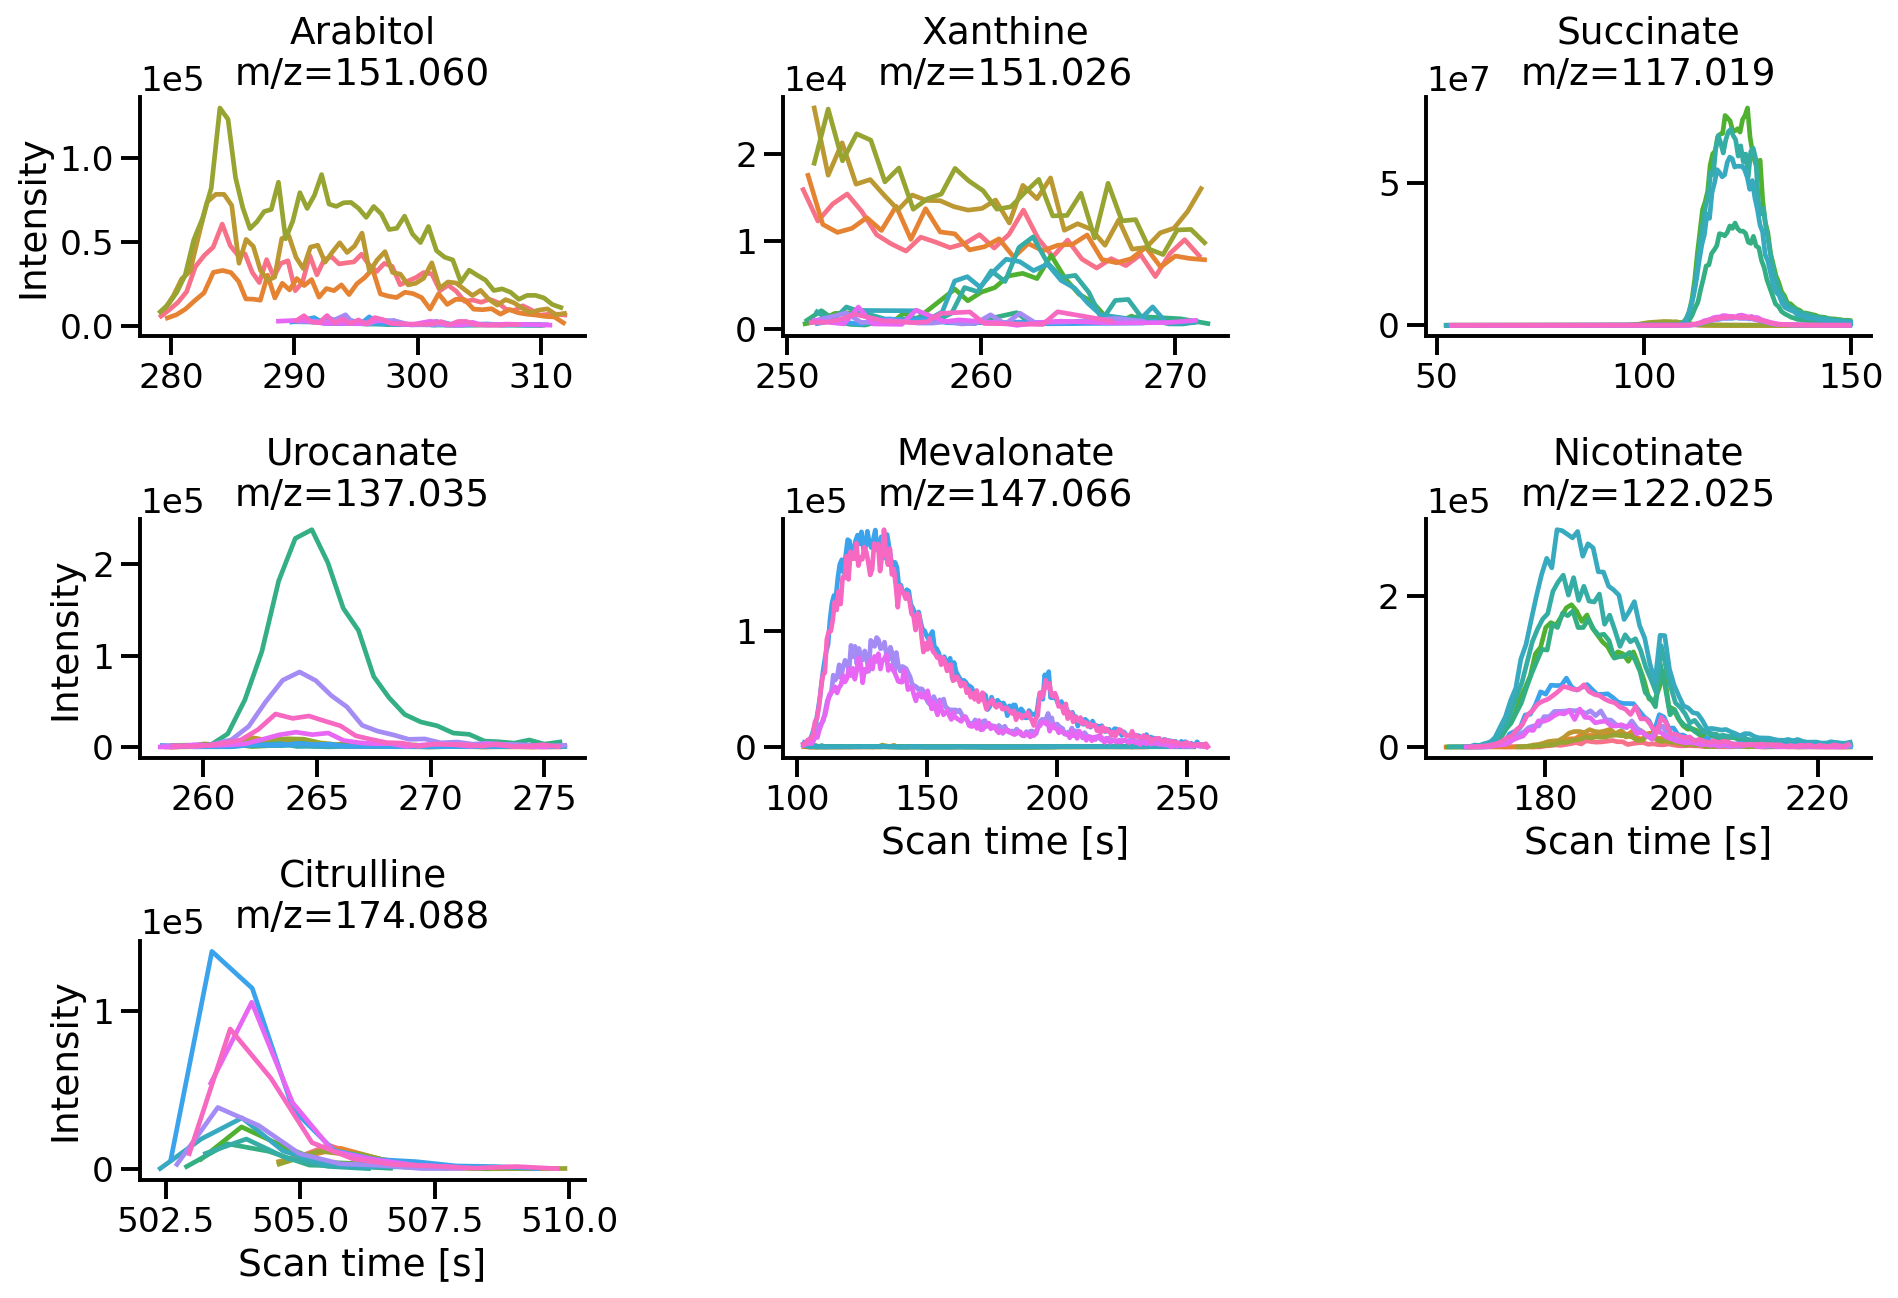

In [7]:
mint.plot.peak_shapes(col_wrap = 3)
plt.savefig('peak-shapes-before-opt.png', facecolor='w')

Reading files...


100%|██████████| 7/7 [00:01<00:00,  6.79it/s]


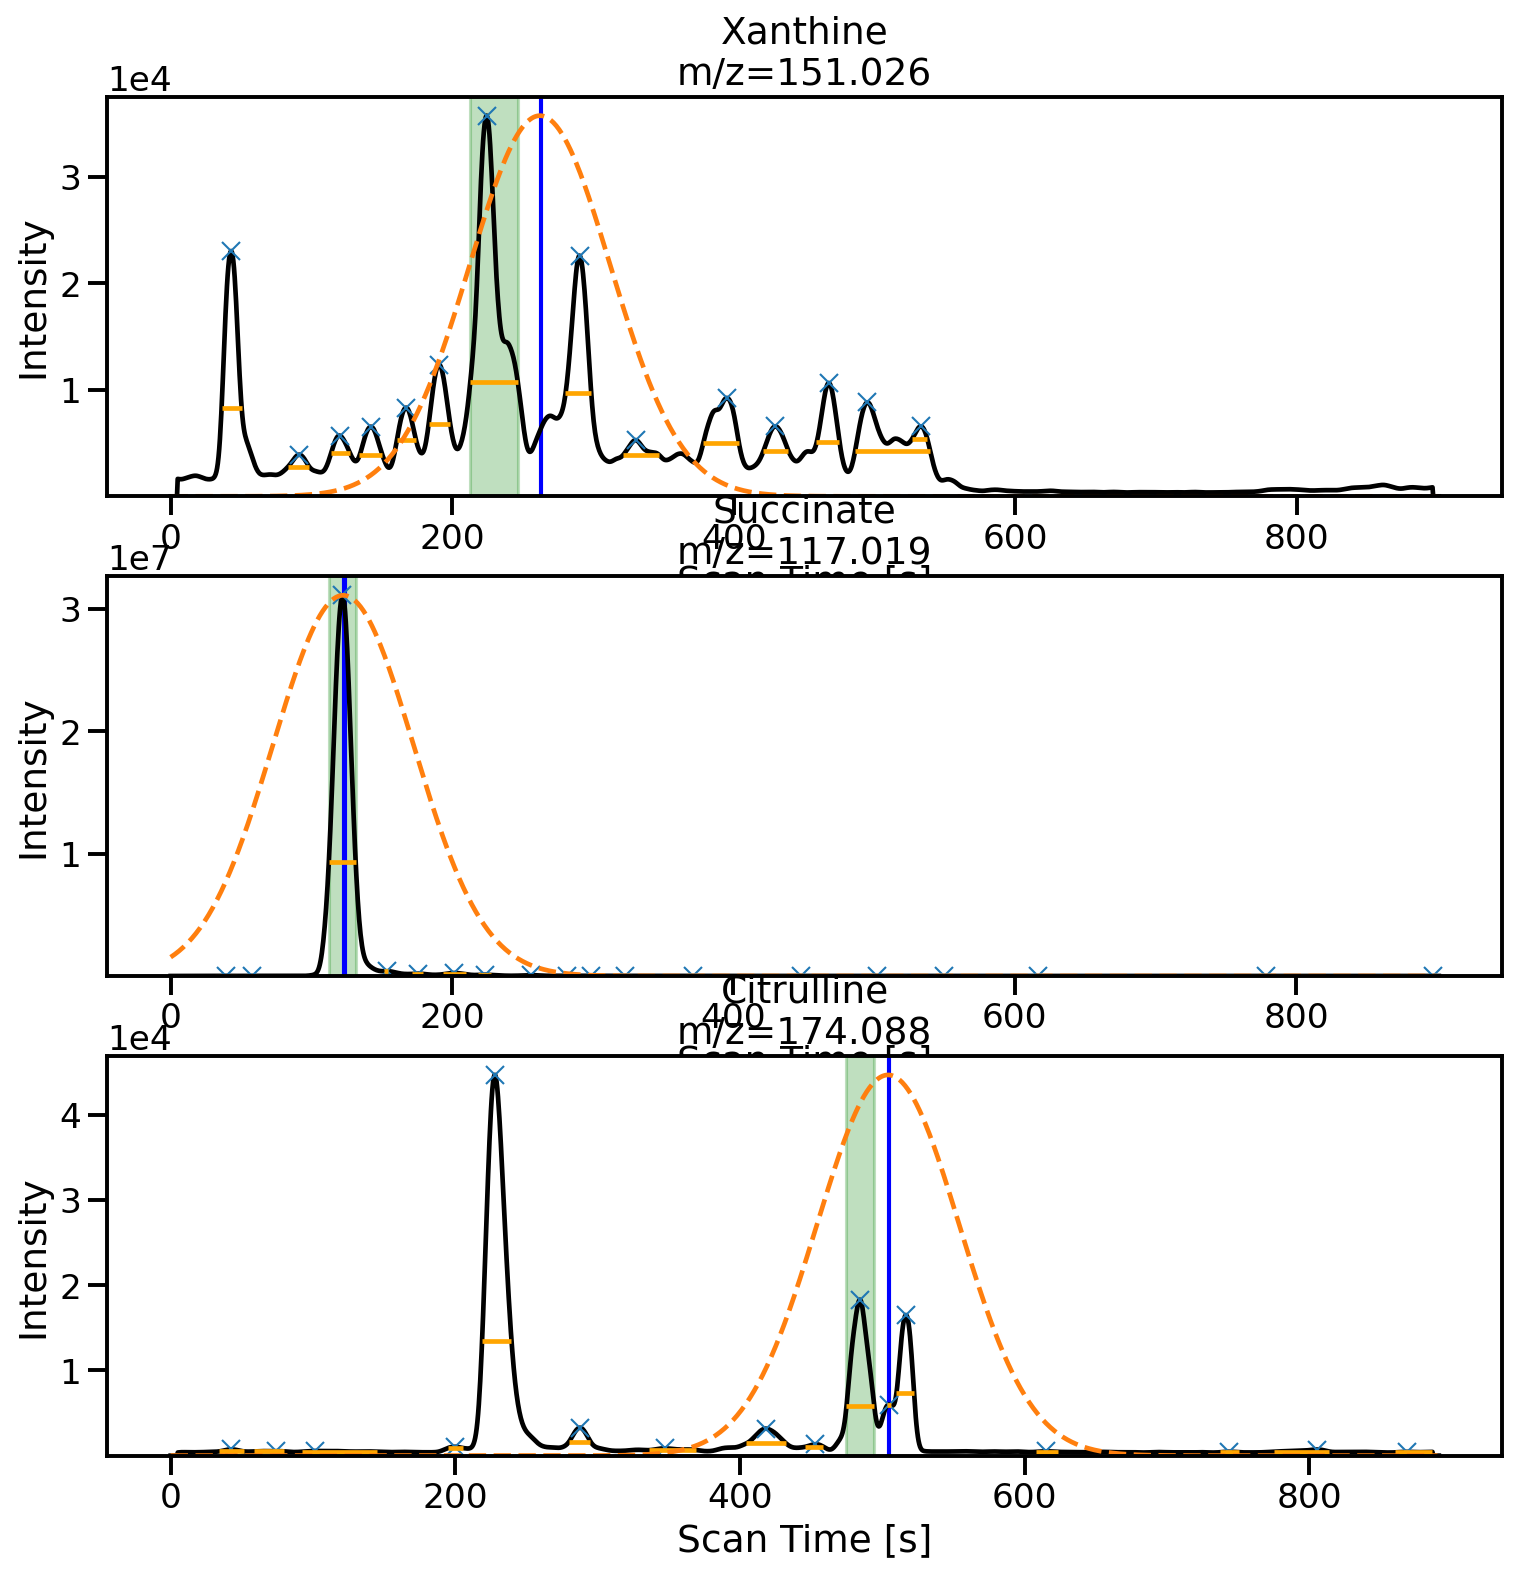

In [8]:
mint.opt.find_rt_min_max(
    peak_labels=['Xanthine', 'Succinate', 'Citrulline'], 
    plot=True, rel_height=0.7, sigma=50, col_wrap=1, aspect=3,
    height=4
)
plt.savefig('opt-rt.png', facecolor='w')

In [9]:
mint.run()

maxtasksperchild: None


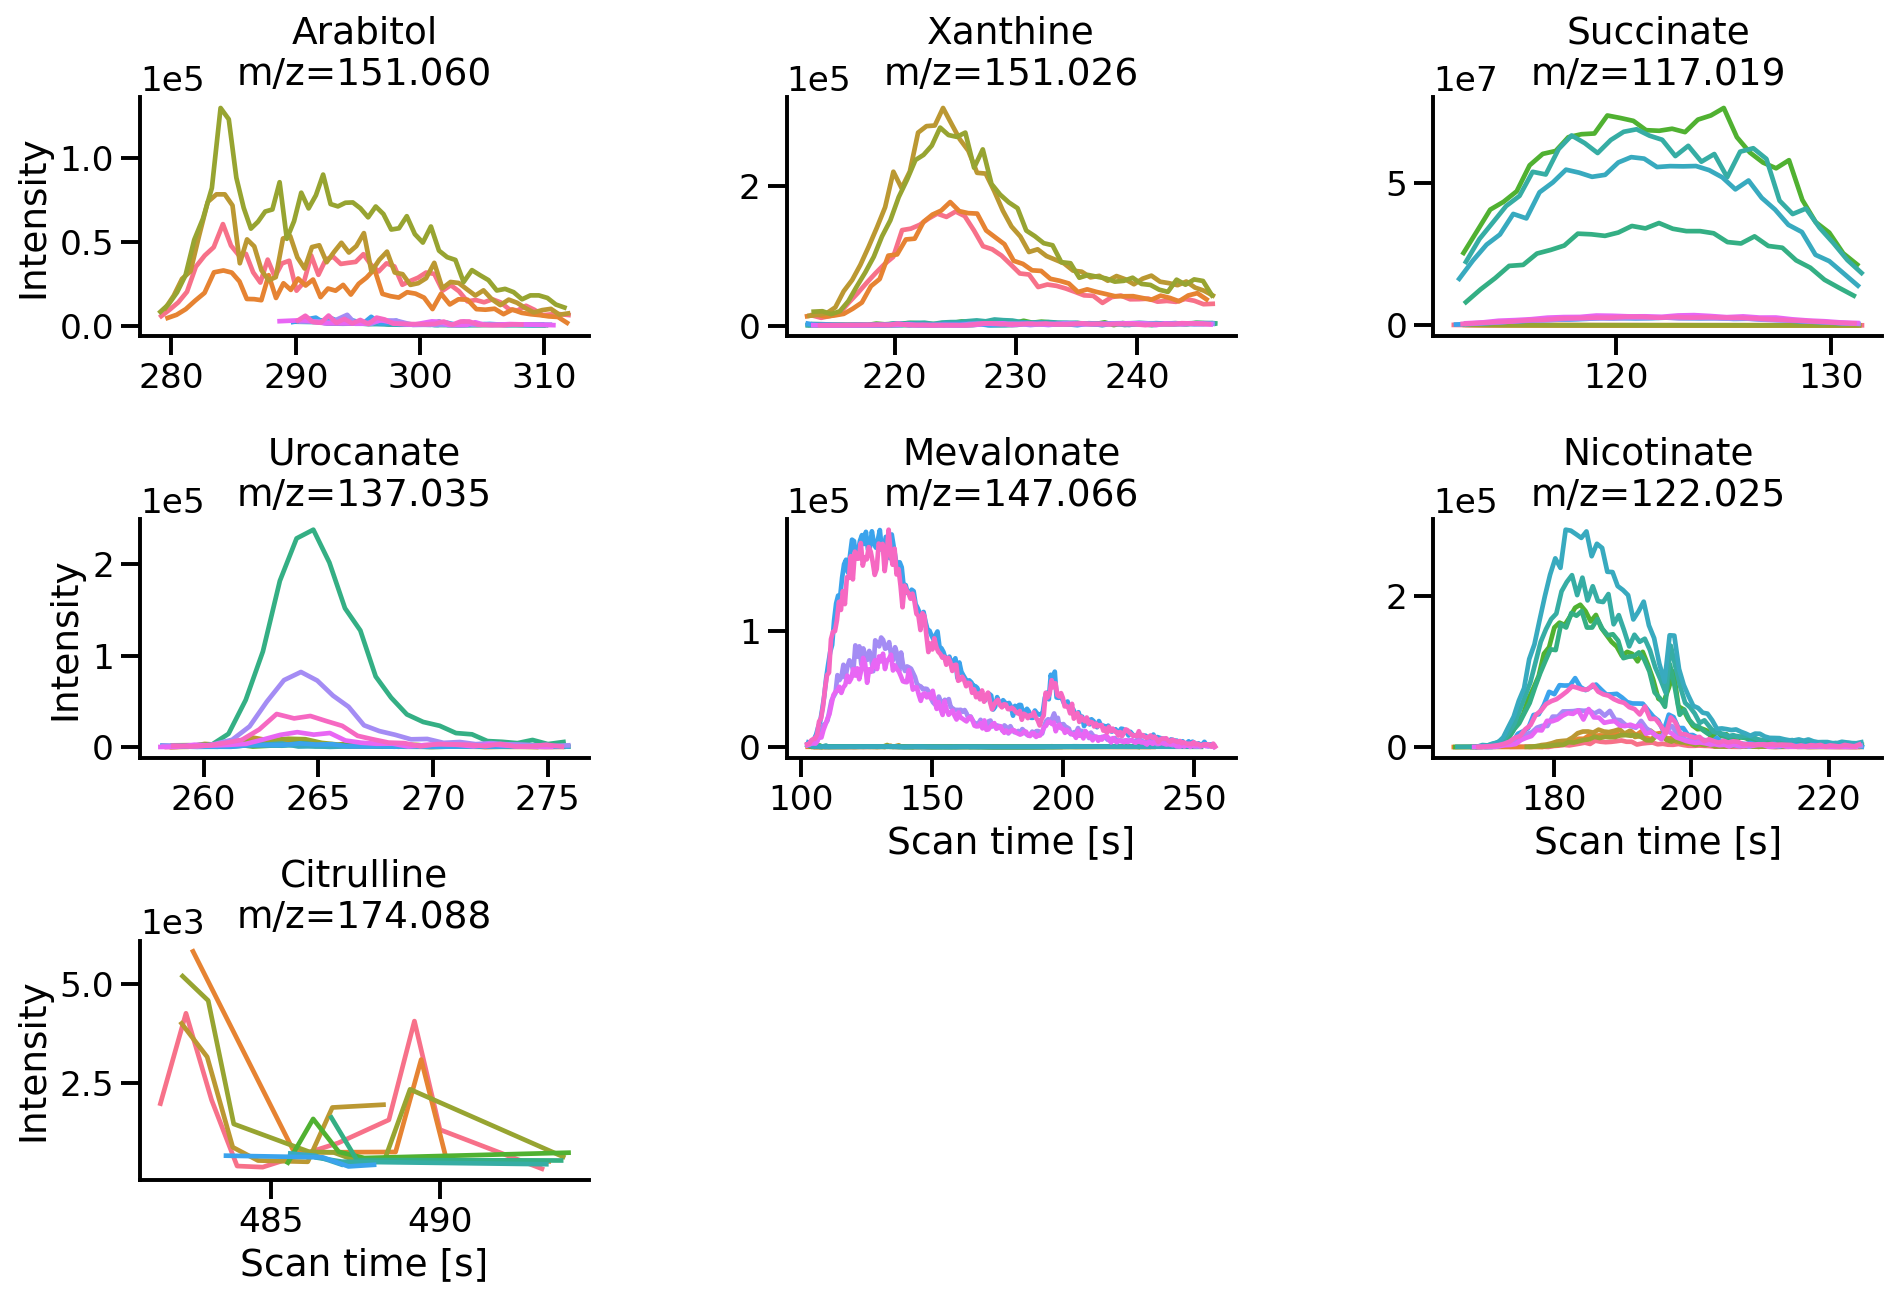

In [10]:
mint.plot.peak_shapes(col_wrap = 3)

Reading files...


100%|██████████| 7/7 [00:00<00:00, 10.11it/s]


(<ms_mint.targets.TargetOptimizer at 0x7f43e27b34f0>,
 <Figure size 5400x600 with 1 Axes>)

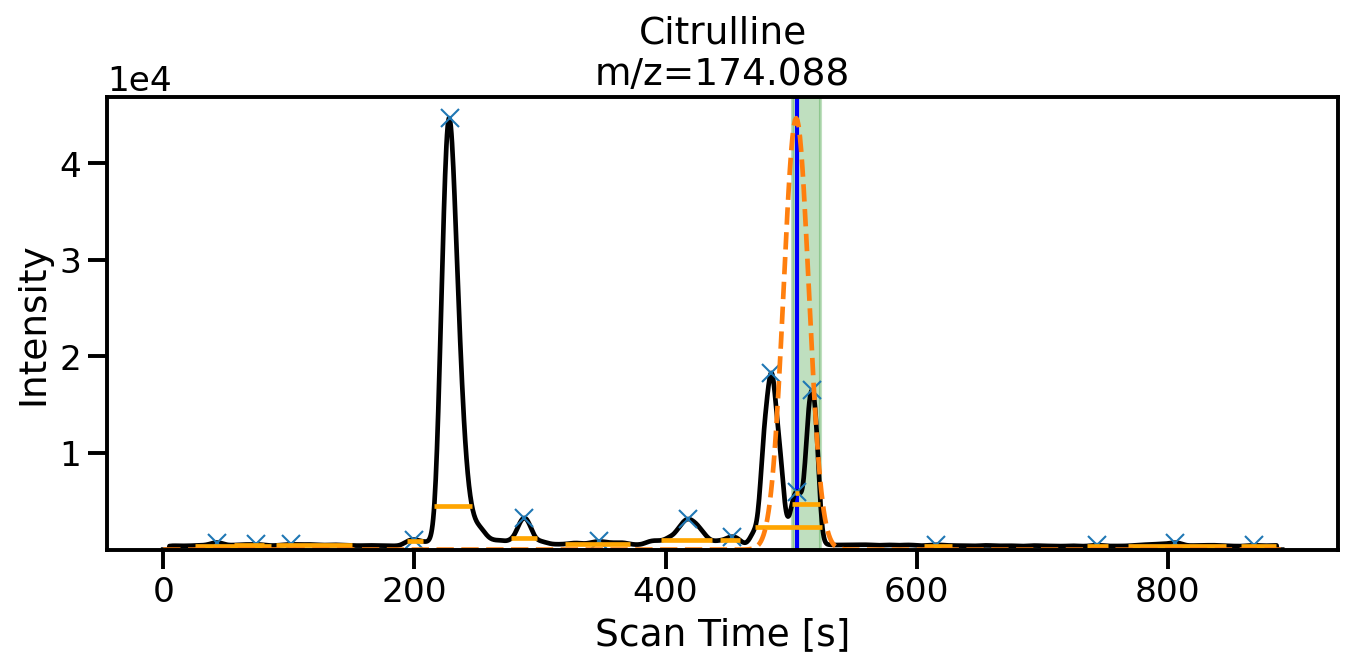

In [11]:
mint.opt.find_rt_min_max(plot=True, peak_labels=['Citrulline'], minimum_intensity=1e2, rel_height=0.9, sigma=10, aspect=3, height=4)

In [12]:
mint.run()

maxtasksperchild: None


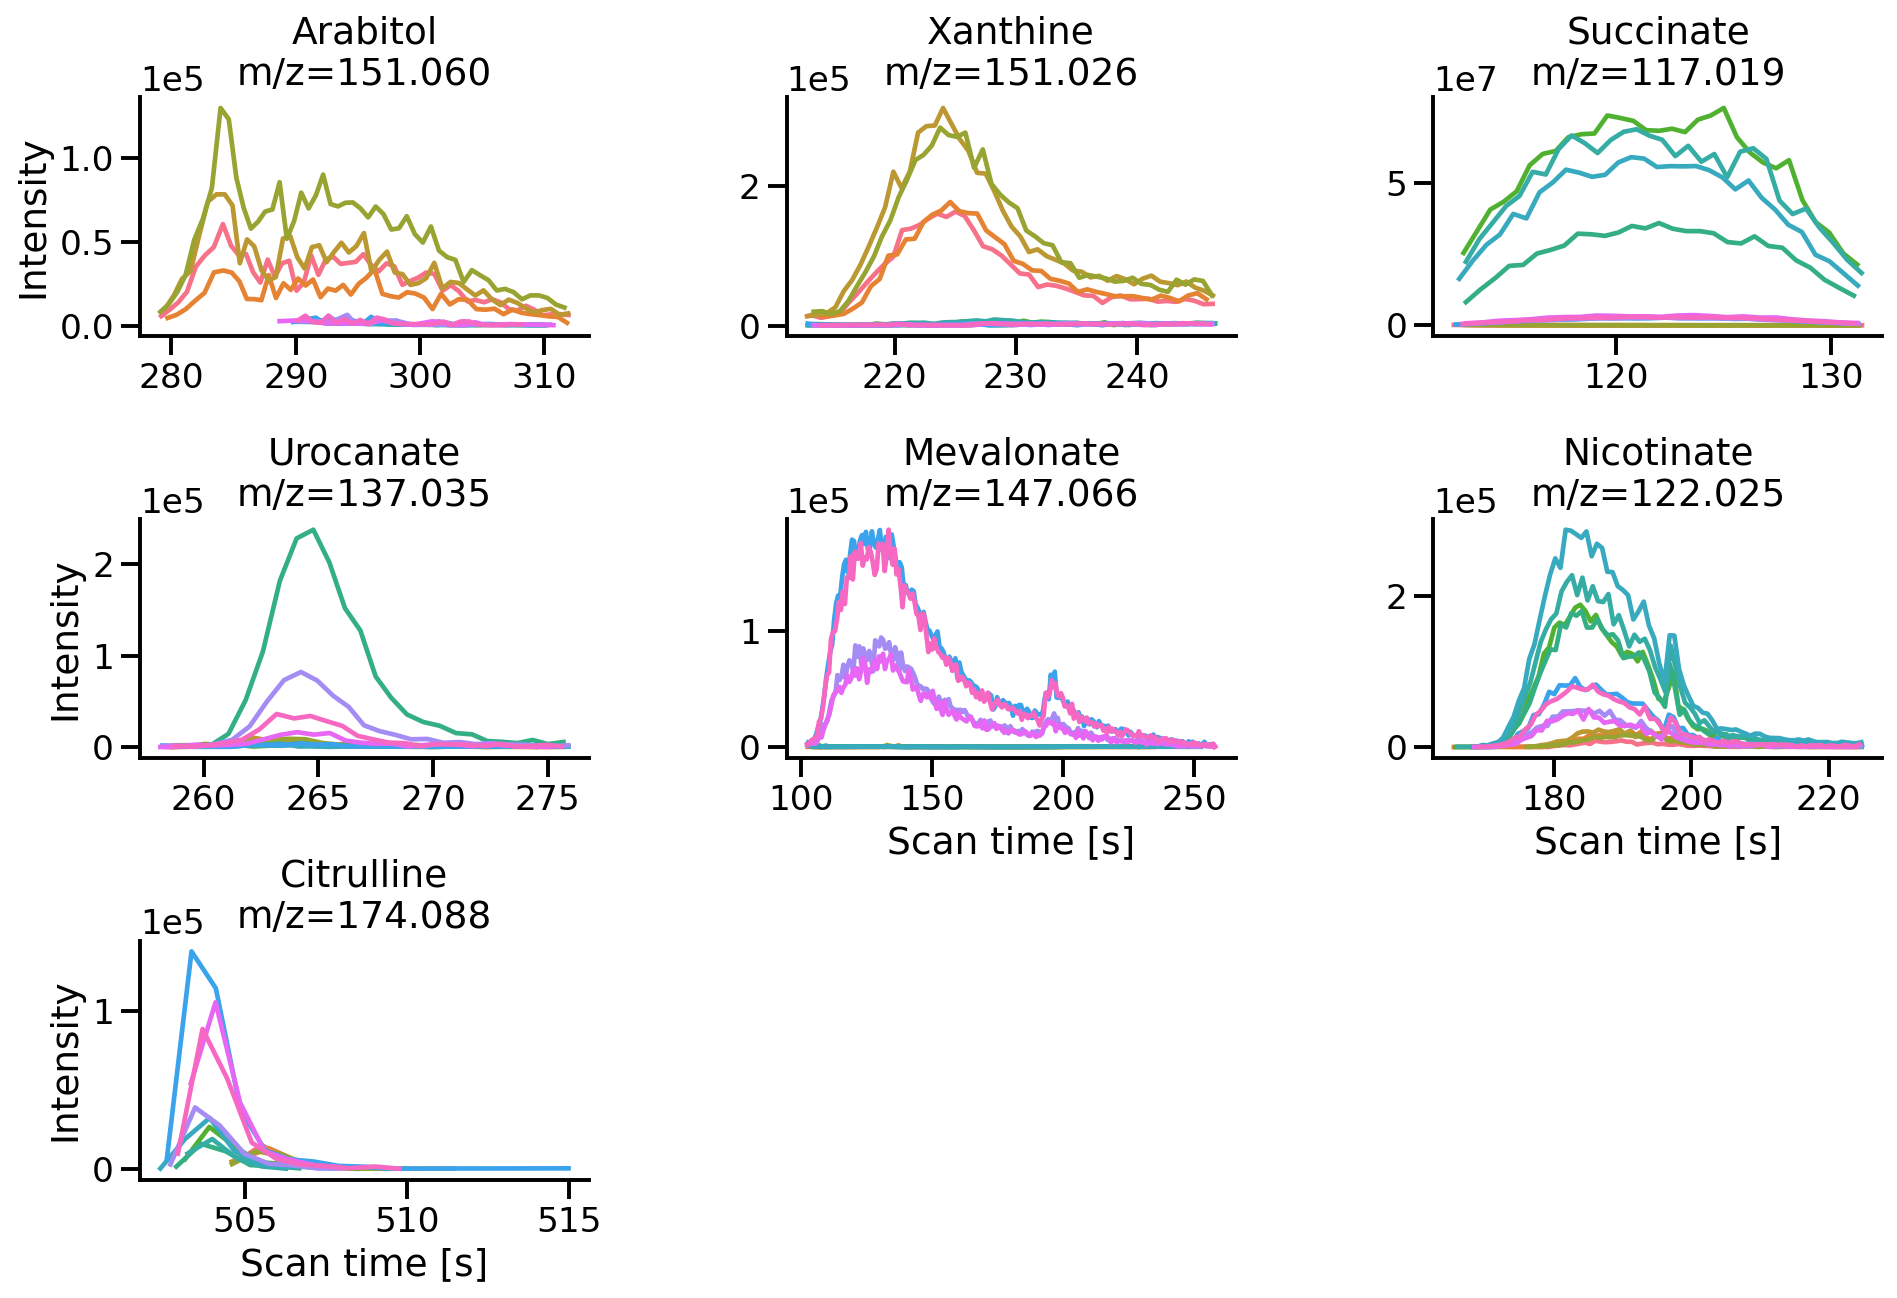

In [13]:
mint.plot.peak_shapes(col_wrap = 3)
plt.savefig('peak-shapes-after-opt.png', facecolor='w')

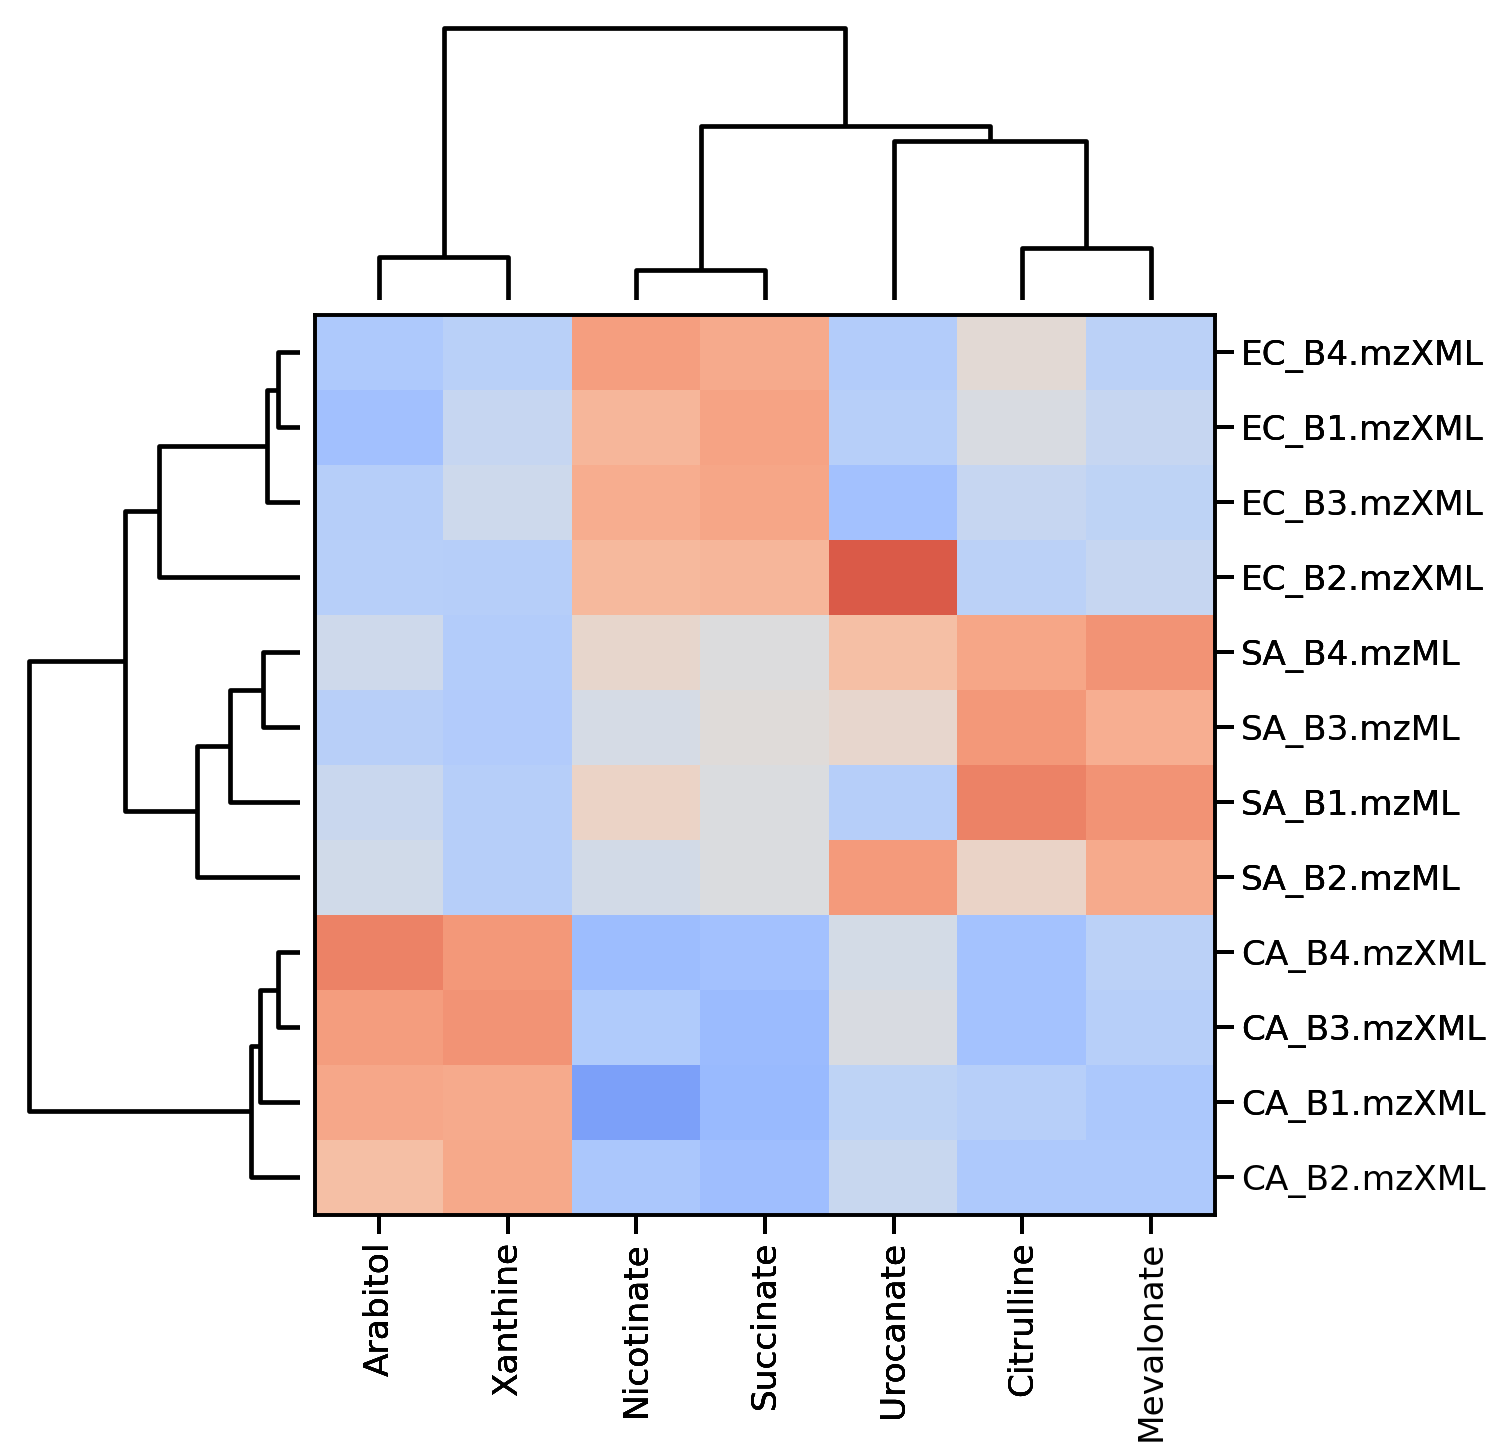

In [14]:
mint.plot.hierarchical_clustering(transform_filenames_func=lambda x: x.split('.')[0])
plt.savefig('hierarchical_clustering.png', facecolor='w', dpi=70)

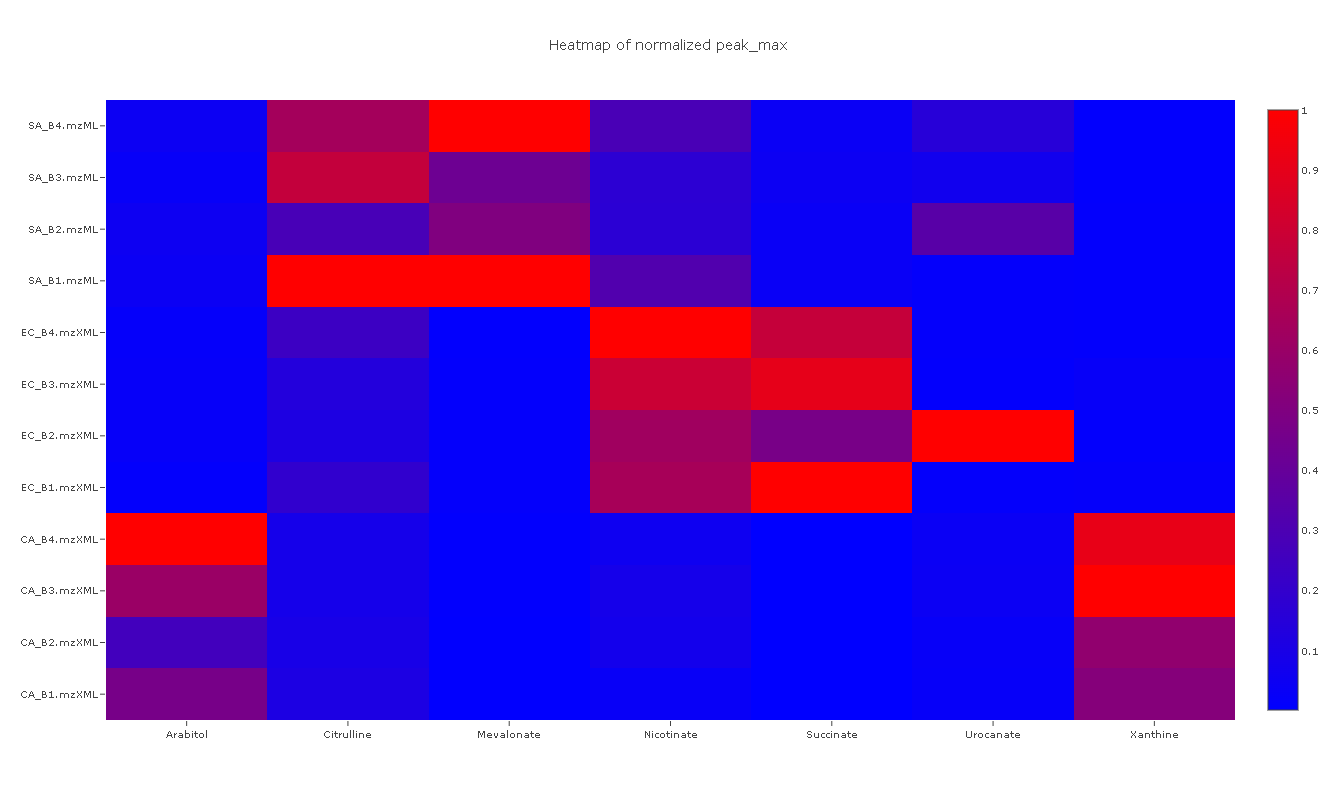

In [15]:
mint.plot.heatmap(height=800, width=800)

<Figure size 1800x1200 with 0 Axes>

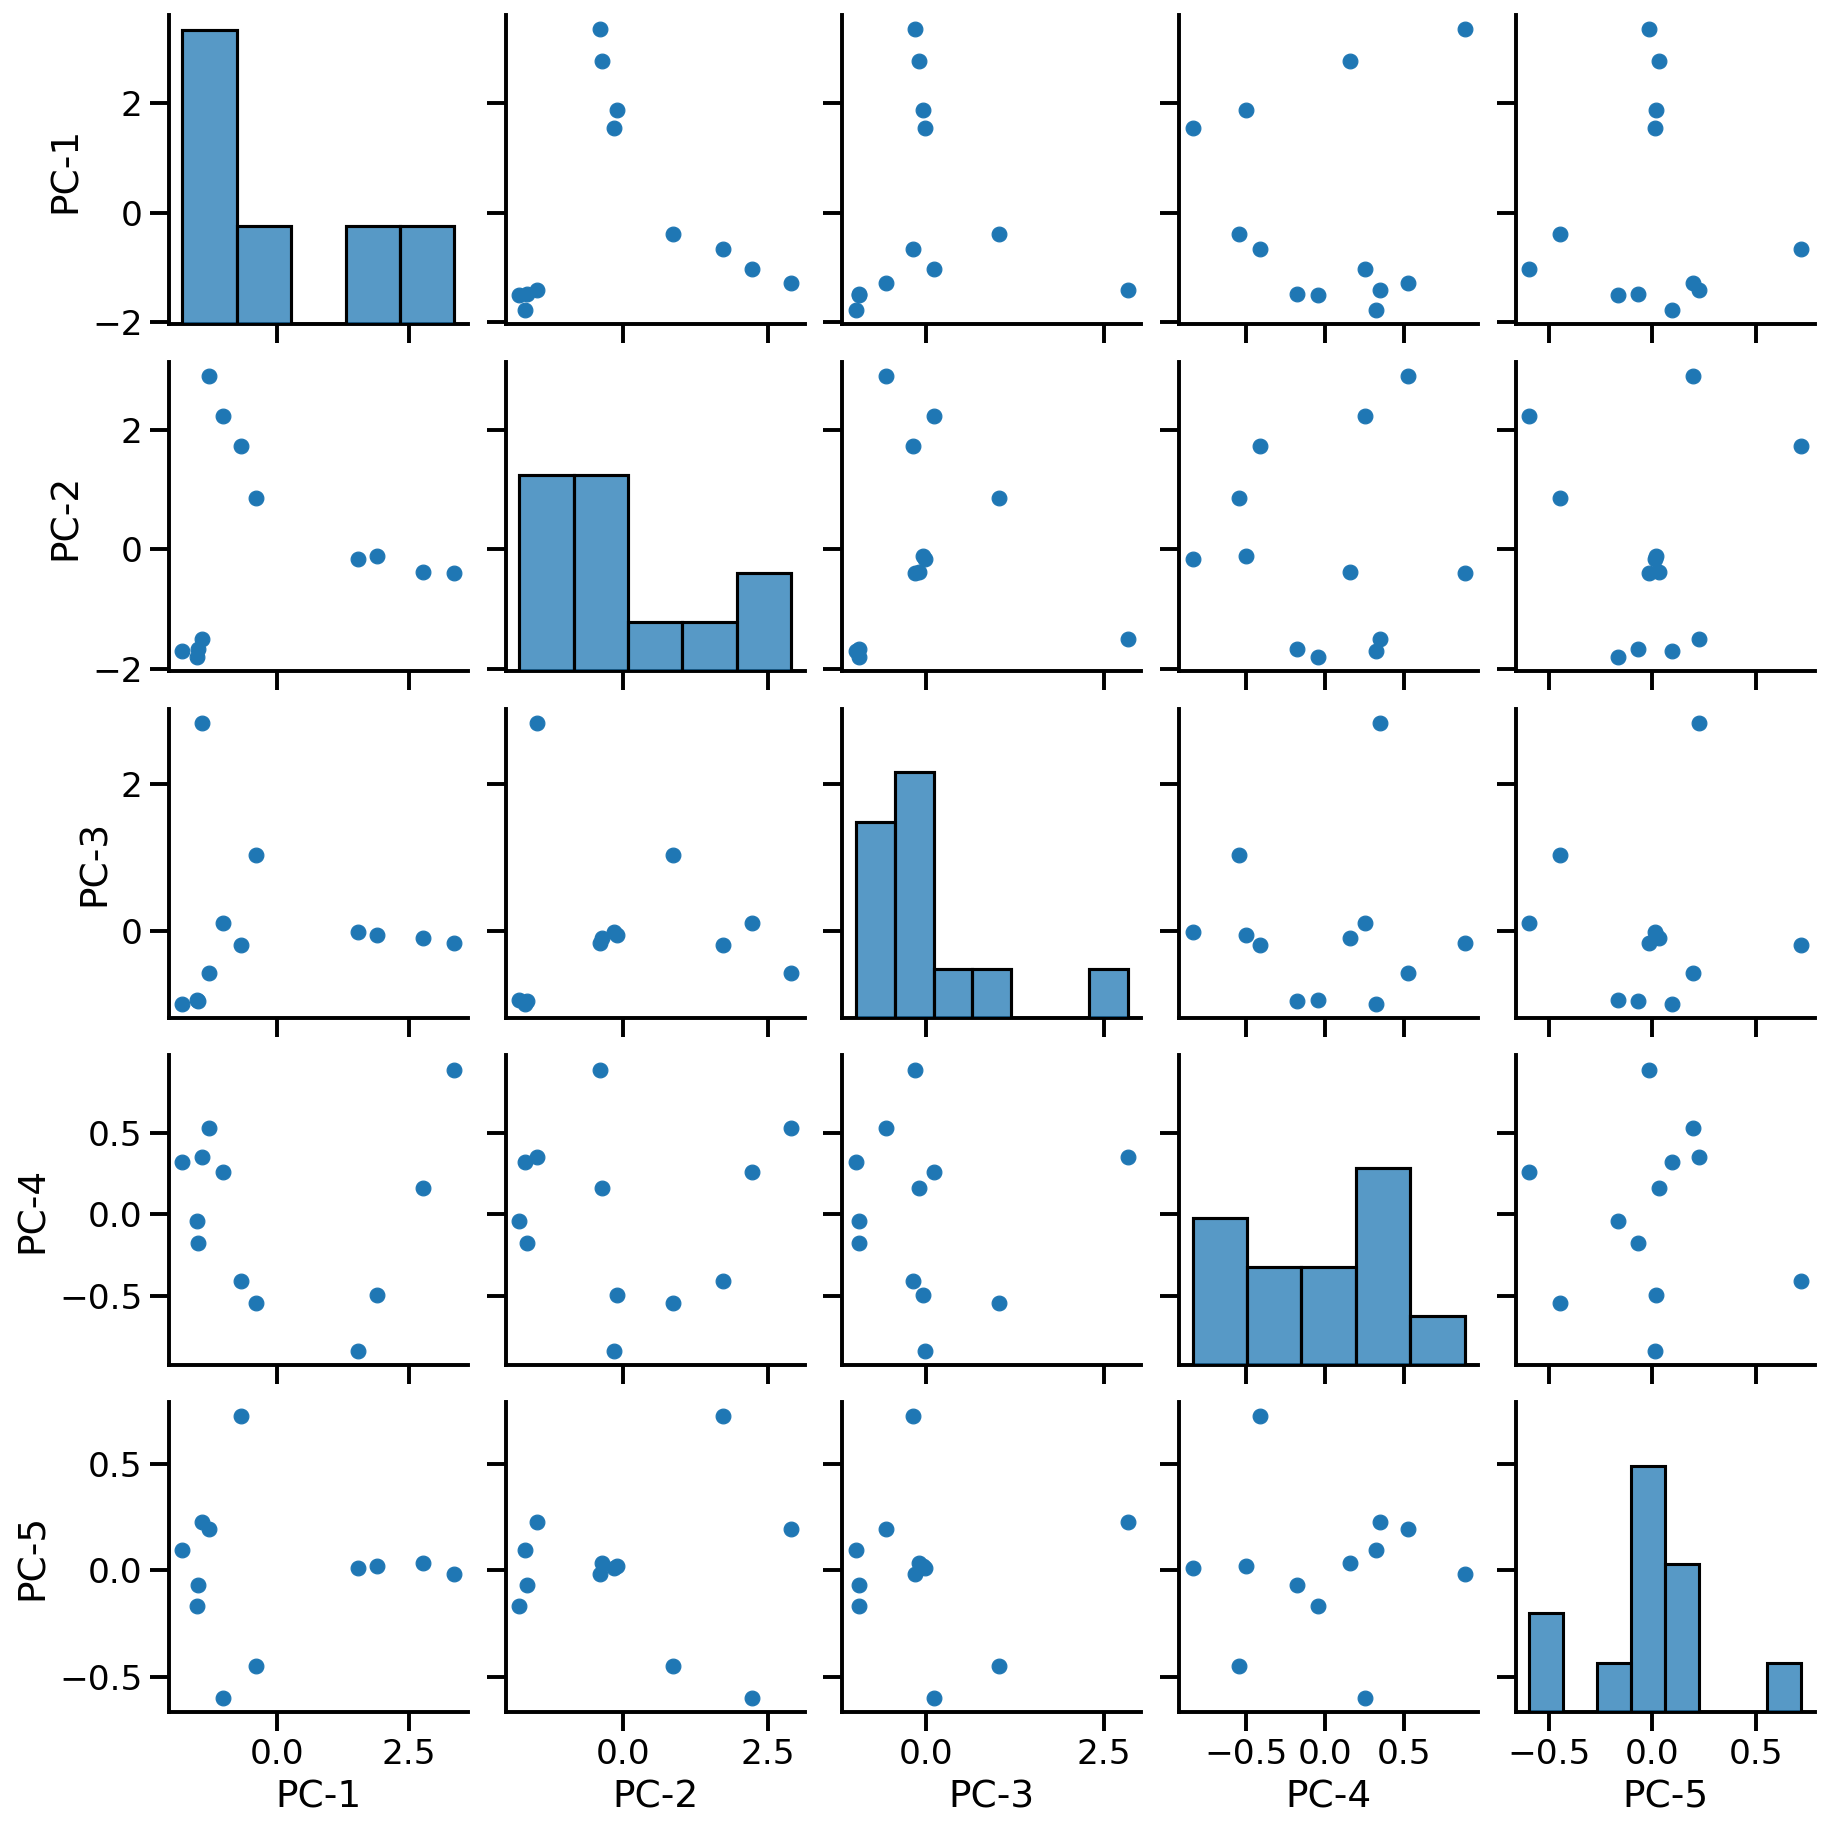

In [16]:
mint.pca.run(5)
mint.pca.plot.pairplot(5)
plt.savefig('pca-pairplot.png', facecolor='w')

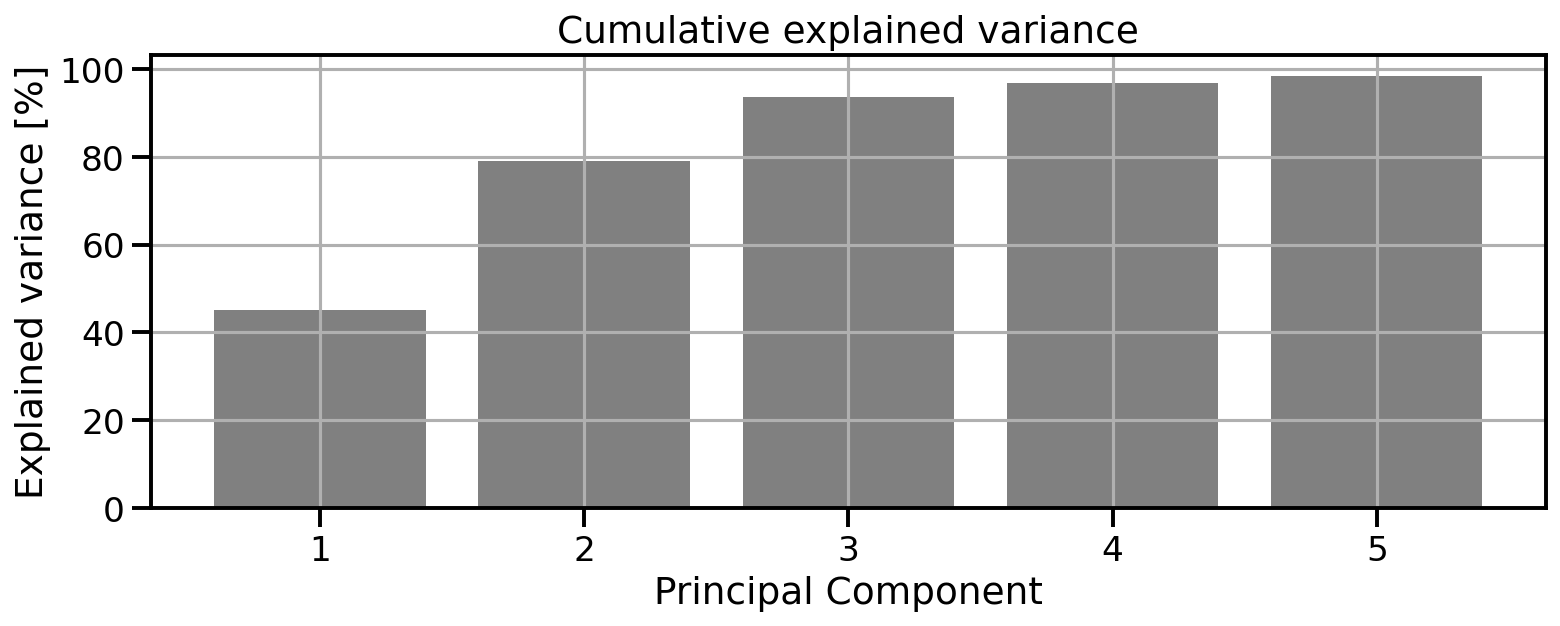

In [17]:
mint.pca.plot.cumulative_variance(aspect=3)
plt.savefig('pca-cum-variance.png')
show()

In [18]:
mint.crosstab()

peak_label       Arabitol     Citrulline    Mevalonate    Nicotinate  \
ms_file                                                                
CA_B1.mzXML  1.421704e+06   30481.532257  1.079768e+04  1.609925e+05   
CA_B2.mzXML  8.612900e+05   31680.464111  2.769283e+04  4.052142e+05   
CA_B3.mzXML  1.767759e+06   31749.627014  2.307474e+04  4.995515e+05   
CA_B4.mzXML  2.758197e+06   30553.329956  1.872207e+04  3.364592e+05   
EC_B1.mzXML  9.367943e+03   58993.826996  1.731905e+04  4.374188e+06   
EC_B2.mzXML  1.258591e+04   34433.640259  2.508552e+04  4.243312e+06   
EC_B3.mzXML  2.769300e+04   38113.932098  1.830538e+04  5.452846e+06   
EC_B4.mzXML  1.389310e+04   70697.324890  1.866846e+04  7.098563e+06   
SA_B1.mzML   4.941656e+04  323563.568268  1.242245e+07  2.074314e+06   
SA_B2.mzML   3.402150e+04   86403.962036  5.745505e+06  1.166553e+06   
SA_B3.mzML   3.550576e+04  222974.540527  4.977766e+06  1.008648e+06   
SA_B4.mzML   6.250757e+04  186700.515137  1.164947e+07  1.913411e+06   

peak_label      Succinate     Urocanate      Xanthine  
ms_file                                                
CA_B1.mzXML  8.023804e+05  4.592103e+04  3.194724e+06  
CA_B2.mzXML  8.435345e+05  4.901078e+04  3.391003e+06  
CA_B3.mzXML  9.537159e+05  6.360579e+04  5.949811e+06  
CA_B4.mzXML  1.135845e+06  7.660836e+04  5.735944e+06  
EC_B1.mzXML  1.737608e+09  3.791885e+04  1.465542e+05  
EC_B2.mzXML  7.511645e+08  1.590697e+06  6.998021e+04  
EC_B3.mzXML  1.571141e+09  3.265613e+04  1.654433e+05  
EC_B4.mzXML  1.321685e+09  3.045529e+04  1.062238e+05  
SA_B1.mzML   4.559086e+07  3.740434e+04  9.224057e+04  
SA_B2.mzML   4.631566e+07  5.246832e+05  8.643928e+04  
SA_B3.mzML   6.076100e+07  1.201190e+05  7.951447e+04  
SA_B4.mzML   5.088042e+07  2.462128e+05  7.726051e+04

In [19]:
mint.results

ms_file  peak_label    mz_mean  mz_width       rt      rt_min  \
0   CA_B1.mzXML    Arabitol  151.06050        10  295.500  279.000000   
1   CA_B1.mzXML    Xanthine  151.02585        10  262.359  212.752688   
2   CA_B1.mzXML   Succinate  117.01905        10  122.634  112.373688   
3   CA_B1.mzXML   Urocanate  137.03540        10  264.900  258.000000   
4   CA_B1.mzXML  Mevalonate  147.06570        10  180.000  102.000000   
..          ...         ...        ...       ...      ...         ...   
79   SA_B4.mzML   Succinate  117.01905        10  122.634  112.373688   
80   SA_B4.mzML   Urocanate  137.03540        10  264.900  258.000000   
81   SA_B4.mzML  Mevalonate  147.06570        10  180.000  102.000000   
82   SA_B4.mzML  Nicotinate  122.02455        10  183.204  165.000000   
83   SA_B4.mzML  Citrulline  174.08810        10  504.042  500.392790   

        rt_max rt_unit  intensity_threshold   target_filename  ...  \
0   312.000000       s                    0  MINT-targets.csv  ...   
1   246.500649       s                    0  MINT-targets.csv  ...   
2   131.430980       s                    0  MINT-targets.csv  ...   
3   276.000000       s                    0  MINT-targets.csv  ...   
4   258.000000       s                    0  MINT-targets.csv  ...   
..         ...     ...                  ...               ...  ...   
79  131.430980       s                    0  MINT-targets.csv  ...   
80  276.000000       s                    0  MINT-targets.csv  ...   
81  258.000000       s                    0  MINT-targets.csv  ...   
82  225.000000       s                    0  MINT-targets.csv  ...   
83  523.114899       s                    0  MINT-targets.csv  ...   

    peak_delta_int                                      peak_shape_rt  \
0       655.581543  279.18,279.86,280.55,281.25,281.96,282.68,283....   
1     16612.371094  213.19,213.94,214.7,215.46,216.22,216.97,217.7...   
2    137534.490723  112.46,113.22,113.98,114.73,115.49,116.25,117....   
3       296.750793  258.39,259.15,259.91,260.67,261.43,262.18,262....   
4        70.615784  105.63,106.39,114.73,115.49,123.83,125.35,127....   
..             ...                                                ...   
79   165448.062500  112.87,113.63,114.39,115.15,115.91,116.66,117....   
80      860.224487  258.68,259.41,260.16,260.9,261.66,262.42,263.1...   
81     1998.365295  102.26,103.02,103.77,104.53,105.29,106.05,106....   
82     3305.074646  168.98,169.74,171.26,172.02,172.78,173.53,174....   
83     9467.294495  502.94,503.7,504.46,505.22,505.98,506.74,507.4...   

                                       peak_shape_int  peak_mass_diff_25pc  \
0   6006,9870,14188,20467,35327,41981,46871,60581,...             2.330528   
1   14710,11319,14028,18028,33059,46889,61425,7535...            -0.313772   
2   144502,102981,80033,61764,56466,39326,30992,31...             0.200705   
3   451,911,869,2694,5126,4307,4910,5561,2827,2801...            -0.693082   
4   333,377,475,479,444,428,548,562,721,511,1240,4...             1.689628   
..                                                ...                  ...   
79  504985,832045,1115945,1345337,1803320,1926285,...             2.678225   
80  1766,1006,1997,4815,8260,19600,36457,31669,343...             1.895788   
81  2681,3101,5945,7104,7598,10937,22360,25050,350...             4.231623   
82  435,645,2091,3105,4858,7611,12579,15085,23960,...             2.012154   
83  9863,88422,57226,16780,6591,2986,2024,678,1730...             1.821223   

    peak_mass_diff_50pc  peak_mass_diff_75pc  peak_score  total_intensity  \
0              2.482045             2.633562    0.061349     2.552636e+10   
1             -0.212738            -0.212738    0.342670     2.552636e+10   
2              0.265903             0.265903    0.006247     2.552636e+10   
3             -0.331197            -0.108499    0.123961     2.552636e+10   
4              2.104648             2.208403    0.015584     2.552636e+10   
..            